In [70]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

from statsmodels.stats.outliers_influence import variance_inflation_factor

## loading data

In [30]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 

In [31]:
# change to DataFrame
df_car = pd.DataFrame(data=X, 
                      columns=automobile.data.feature_names)
df_car.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [32]:
df_car.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
dtype: object

In [33]:
df_car.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [34]:
df_car["normalized-losses"].value_counts()

normalized-losses
161.0    11
91.0      8
150.0     7
128.0     6
134.0     6
104.0     6
95.0      5
102.0     5
103.0     5
74.0      5
85.0      5
168.0     5
94.0      5
65.0      5
106.0     4
122.0     4
148.0     4
118.0     4
93.0      4
101.0     3
125.0     3
137.0     3
154.0     3
83.0      3
115.0     3
119.0     2
87.0      2
194.0     2
197.0     2
108.0     2
89.0      2
164.0     2
158.0     2
145.0     2
192.0     2
188.0     2
81.0      2
110.0     2
113.0     2
129.0     2
153.0     2
107.0     1
78.0      1
186.0     1
231.0     1
77.0      1
98.0      1
121.0     1
90.0      1
142.0     1
256.0     1
Name: count, dtype: int64

## Handle missing values

<Axes: >

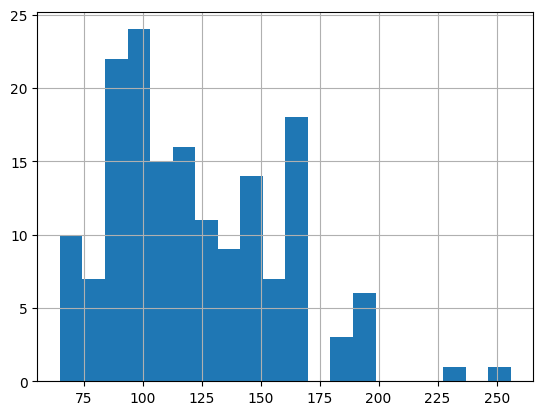

In [35]:
df_car["normalized-losses"].hist(bins=20)

In [36]:
#if missing values exists, handle them here
df_car_cleaned = df_car.copy()
df_car_cleaned["normalized-losses"] = df_car_cleaned["normalized-losses"].fillna(df_car_cleaned["normalized-losses"].mean())
df_car_cleaned = df_car_cleaned.dropna()
df_car_cleaned.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,122.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [37]:
df_car_cleaned.isnull().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
dtype: int64

## EDA

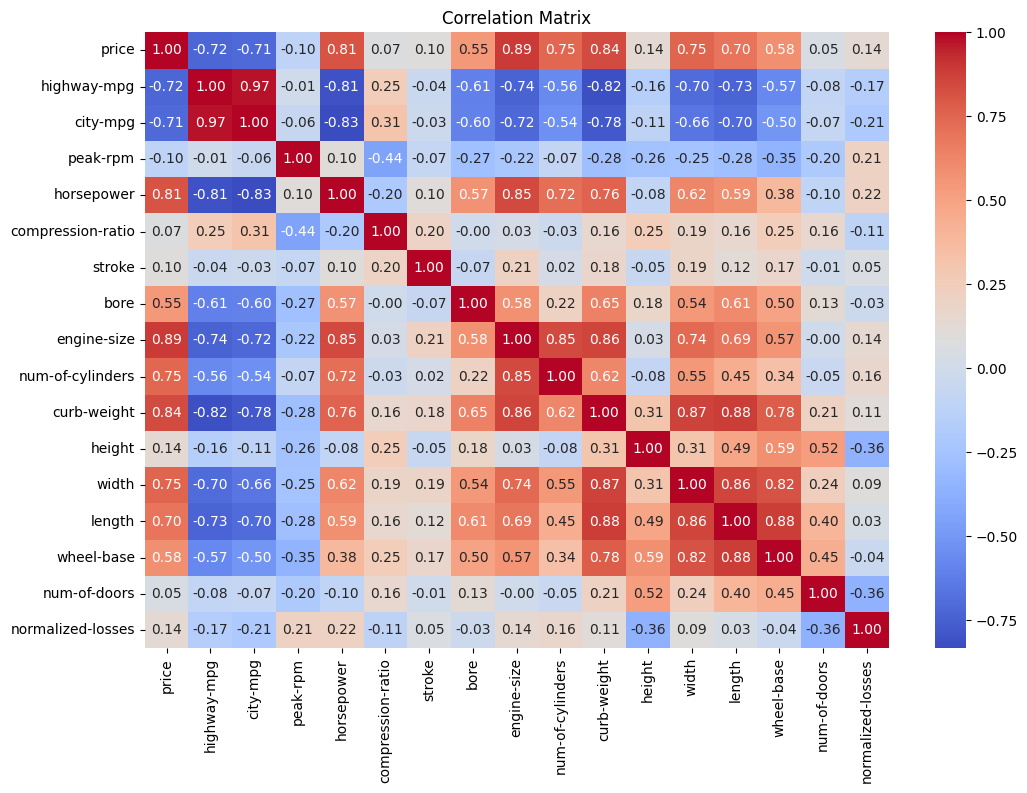

In [38]:
# explore correlations between variables and car prices
# only numerical columns are considered in correlation matrix
corr_matrix = df_car_cleaned.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

In [39]:
# show ranking about high correlations with price
correlation_with_price = corr_matrix["price"].sort_values(ascending=False).drop("price")
print(correlation_with_price)

engine-size          0.888778
curb-weight          0.835368
horsepower           0.812453
width                0.754649
num-of-cylinders     0.746007
length               0.695928
wheel-base           0.584951
bore                 0.546295
normalized-losses    0.138700
height               0.136234
stroke               0.096007
compression-ratio    0.074483
num-of-doors         0.046460
peak-rpm            -0.103835
city-mpg            -0.706618
highway-mpg         -0.719178
Name: price, dtype: float64


price is correlate with horsepower(0.81), engine-size(0.89), curb-weight(0.84). <br>
after training base model, adjest variables using PCA.

## training base model

In [40]:
# train base model
x = df_car_cleaned.drop("price", axis=1).select_dtypes(include=[np.number])
y = df_car_cleaned["price"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)
model = LinearRegression() # hypterparameter don't tune here
model.fit(x_train, y_train)

# R-squared
print("R-squared(train): {:.3f}".format(model.score(x_train, y_train)))
print("R-squared(test): {:.3f}".format(model.score(x_test, y_test)))

# coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R-squared(train): 0.869
R-squared(test): 0.646
Coefficients: [ 3.13055444e+02 -3.42068401e+02  2.34174987e+00  4.13023753e+01
  2.94463837e+02 -3.74194294e+03 -2.57858234e+03  1.80464005e+02
 -1.54022210e+03  8.79362393e-01  4.93796145e+02  7.00821670e+02
 -9.11919501e+01 -2.57123461e+01  4.80001595e+01  5.96992720e+00]
Intercept: -59718.93624185386


In [41]:
def train_linear_regression_model(x_train, y_train, x_test, y_test):
    """ base model without feature engineering and hyperparameter tuning """
    model = LinearRegression()
    model.fit(x_train, y_train)
    print("R-squared(train): {:.3f}".format(model.score(x_train, y_train)))
    print("R-squared(test): {:.3f}".format(model.score(x_test, y_test)))
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    return model

def evaluate_linear_regression(x,y,test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=123)
    model = train_linear_regression_model(x_train, y_train, x_test, y_test)
    return model

## feature engineering

- ☑️standard scaler 
- ☑️handle outlier
- feature selection(perhaps PCA?)
- cross validation
- check for linearity

### outlier handling

In [42]:
def outlier_plot(df, numerical_columns):
    """ Plot histograms for multiple columns with outlier boundaries using IQR method """
    n_cols = 3 # 1 lines fof 3 plots
    n_rows = int(np.ceil(len(numerical_columns) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]

        # plot
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="skyblue")
        axes[i].hist(df[col], bins=30, color='blue', alpha=0.7)
        axes[i].axvline(lower, color='r', linestyle='--')
        axes[i].axvline(upper, color='r', linestyle='--')
        axes[i].set_title(f"{col}\nOutliers: {len(outliers)}/{len(df)}", fontsize=10)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

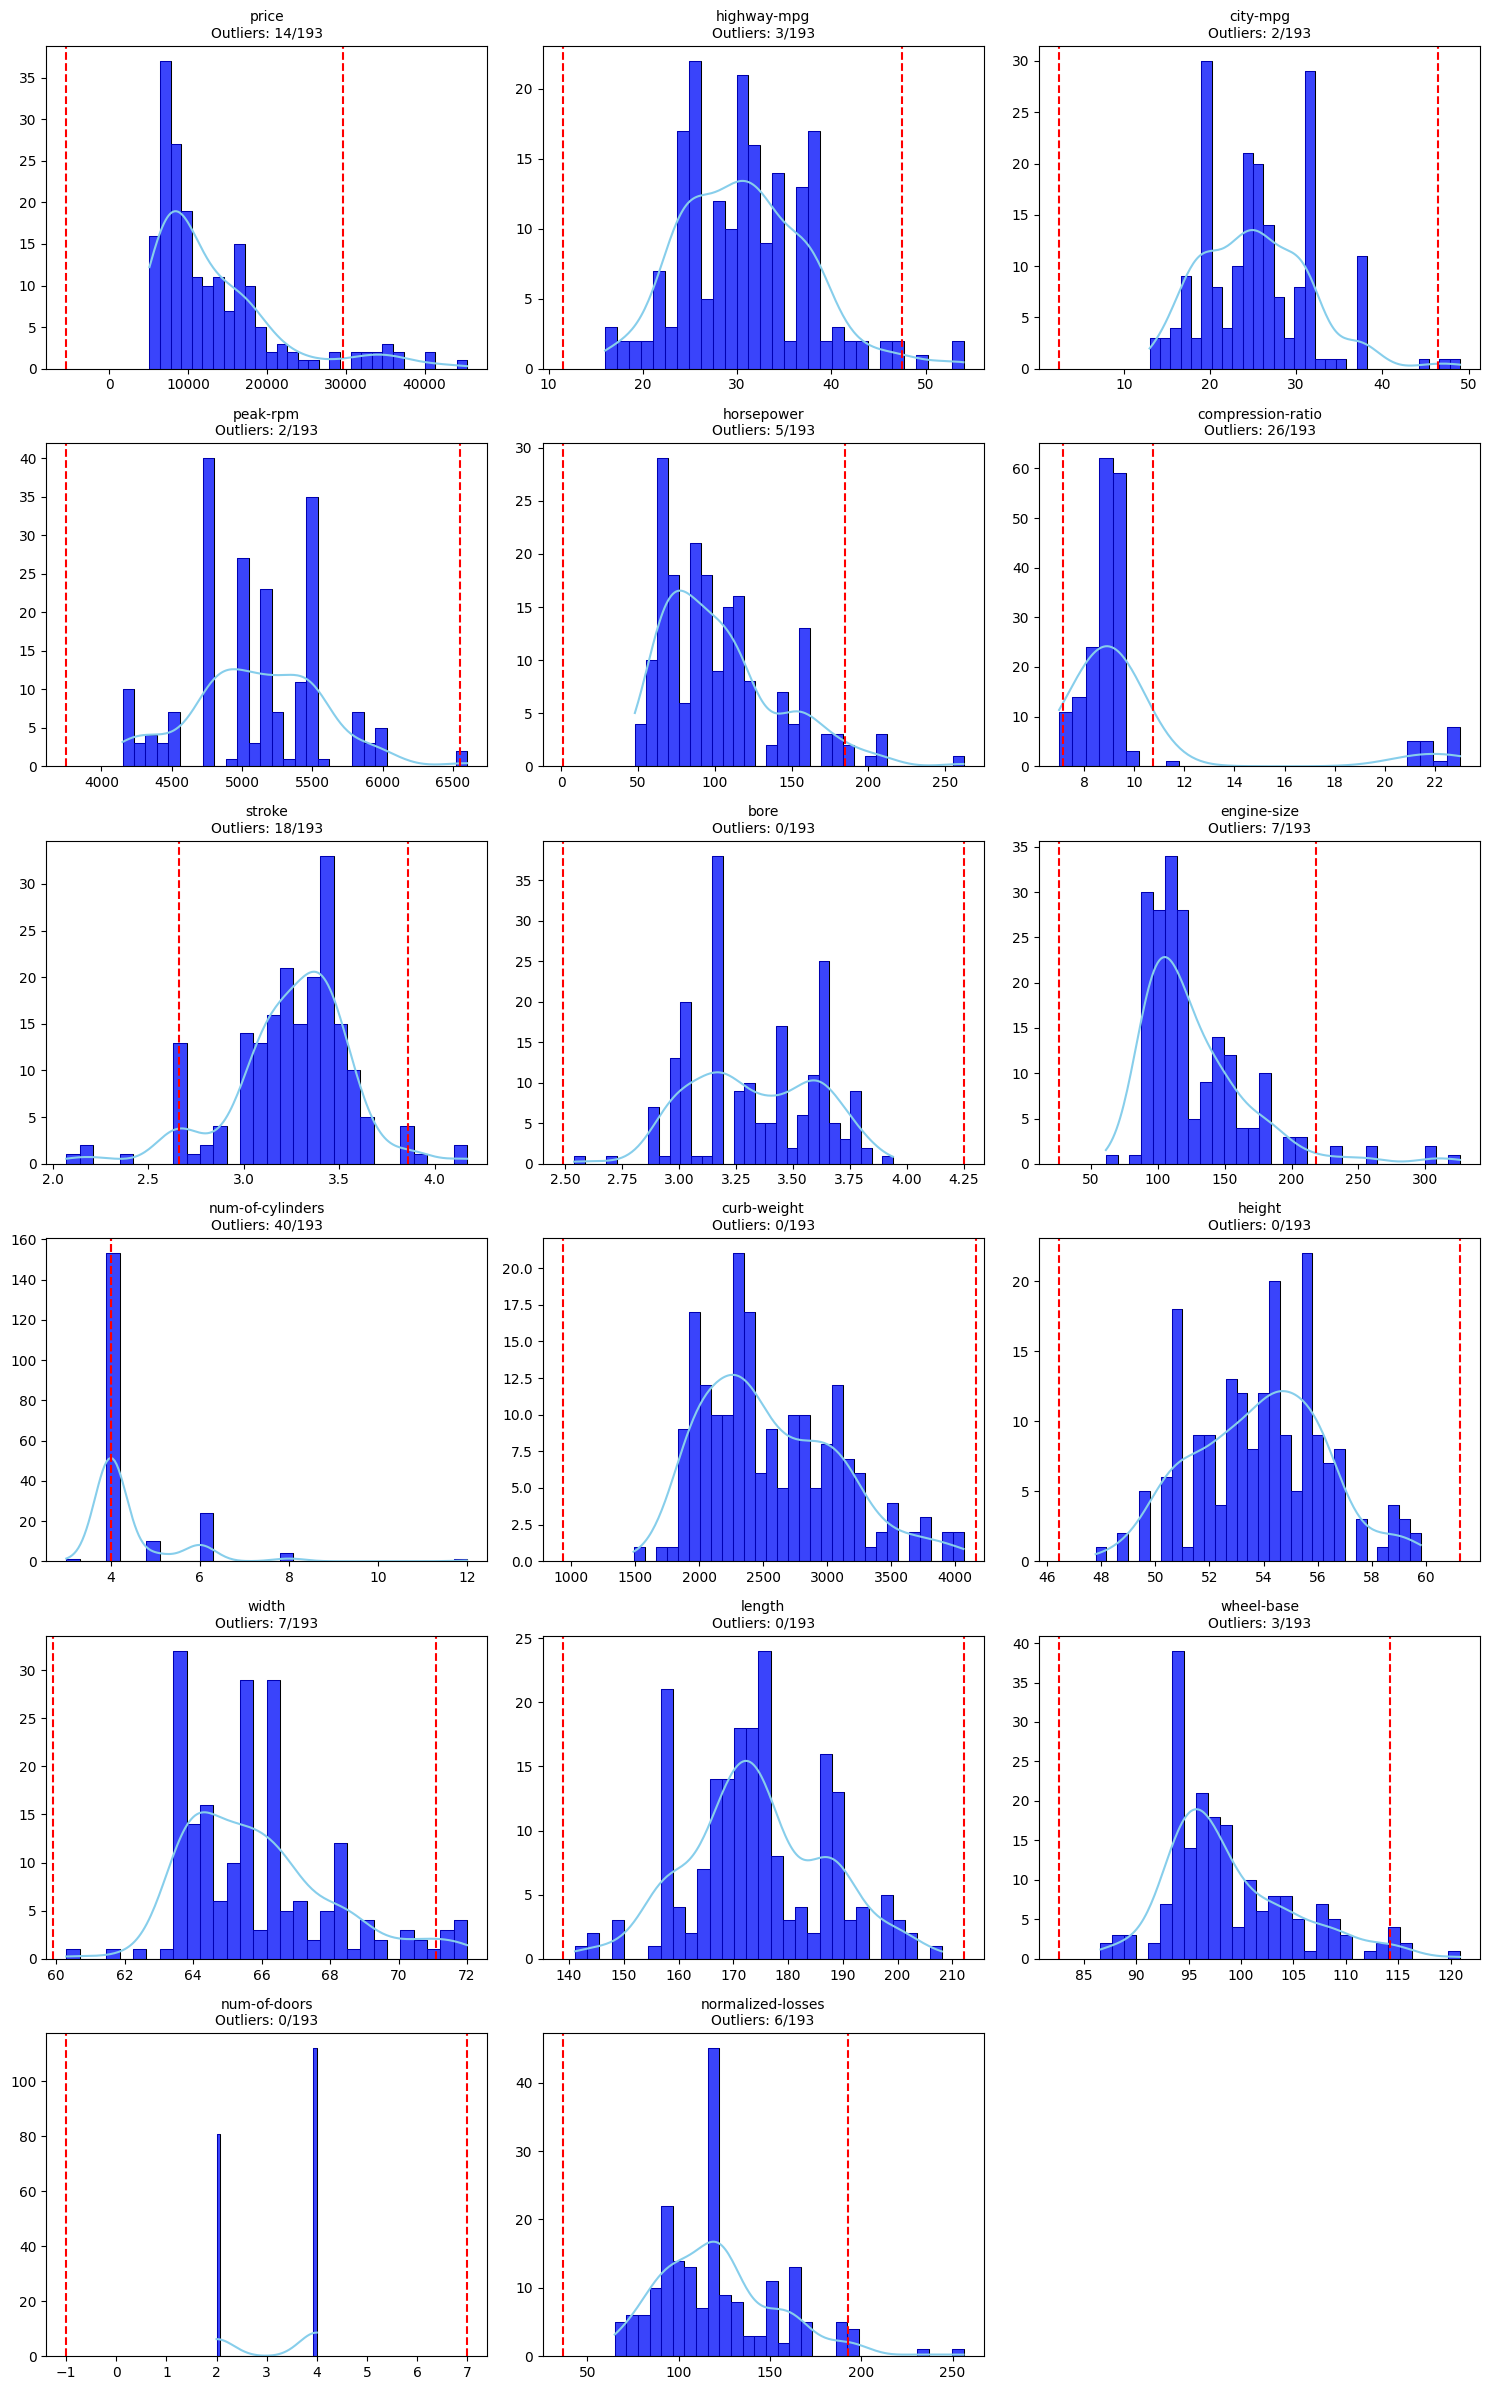

In [43]:
numerical_columns = df_car_cleaned.select_dtypes(include=[np.number]).columns.tolist()
outlier_plot(df_car_cleaned, numerical_columns)

In [44]:
# handle outliers by removing rows with outliers
df_car_no_outliers = df_car_cleaned.copy()
for col in numerical_columns:
    Q1 = df_car_no_outliers[col].quantile(0.25)
    Q3 = df_car_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_car_no_outliers = df_car_no_outliers[(df_car_no_outliers[col] >= lower) & (df_car_no_outliers[col] <= upper)]

In [45]:
# train model after handling outliers
x = df_car_no_outliers.drop("price", axis=1).select_dtypes(include=[np.number])
y = df_car_no_outliers["price"]

evaluate_linear_regression(x,y)

R-squared(train): 0.887
R-squared(test): 0.325
Coefficients: [-2.71891417e+01 -2.71880846e+01 -5.90784790e-01  7.14081175e+01
  1.21032373e+03 -1.06314470e+02 -2.94804295e+03 -3.49022625e+01
  1.12549969e-11  8.25362977e+00  1.15995571e+02  3.56706497e+02
  1.01152789e+01 -2.65759932e+02  2.10004321e+01  4.16058780e-01]
Intercept: -13925.909366292655


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### standard scaler

In [46]:
sc = StandardScaler()

# df_car_no_outliers standard scaling
df_scaled = df_car_no_outliers.copy()
numerical_cols = df_scaled.select_dtypes(include=[np.number]).columns.tolist()
df_scaled[numerical_cols] = sc.fit_transform(df_scaled[numerical_cols])
x = df_scaled.drop("price", axis=1).select_dtypes(include=[np.number])
y = df_scaled["price"]
evaluate_linear_regression(x,y)

R-squared(train): 0.887
R-squared(test): 0.325
Coefficients: [-3.83437113e-02 -3.72036965e-02 -7.15872185e-02  5.14677636e-01
  2.06039281e-01 -8.49767278e-03 -2.27775369e-01 -1.77778916e-01
 -2.08166817e-16  8.11398767e-01  8.15755634e-02  1.30023029e-01
  2.88814081e-02 -2.65422171e-01  6.32823987e-03  3.30367775e-03]
Intercept: -0.02198193450567272


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


R-squared isn't change before standard scaler.

## Multicollinearity check
Since accuracy is not improving, verify whether multicollinearity exists.
After removing features with high VIF, re-evaluate the model performance. then may apply PCA.

In [47]:
vif_df = pd.DataFrame()
vif_df["feature"] = x.columns
vif_df["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_df.sort_values(by="VIF", ascending=False))

              feature        VIF
7         engine-size  25.369250
6                bore  23.369086
1            city-mpg  19.748871
0         highway-mpg  16.226330
9         curb-weight   9.104297
5              stroke   8.549418
12             length   8.163818
13         wheel-base   7.262938
3          horsepower   6.231530
11              width   4.954020
10             height   2.965860
2            peak-rpm   2.317862
4   compression-ratio   2.312377
14       num-of-doors   2.086423
15  normalized-losses   2.026740
8    num-of-cylinders        NaN


/Users/tasukukurasawa/projectdir/data-science-portfolio-taskmemo/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


### Handle multicollinearity and remove redundant features

To reduce overfitting and stabilize the regression model, remove features with **high multicollinearity** (VIF > 10) and **high pairwise correlations** (|r| > 0.85). 

**Example of highly correlated feature pairs:**
- `city-mpg` and `highway-mpg` (r = 0.97) → keep `highway-mpg`
- `engine-size` and `horsepower` (r = 0.85) → keep `engine-size`
- `engine-size` and `num-of-cylinders` (r = 0.85) → keep `engine-size`
- `curb-weight` and `length` (r = 0.87) → keep `curb-weight`
- `length` and `wheel-base` (r = 0.88) → keep `curb-weight` as representative of size

**Features to remove:**
- `city-mpg`
- `horsepower`
- `num-of-cylinders`
- `length`
- `wheel-base`

**Rationale:**  
These variables are strongly correlated with others that capture similar vehicle characteristics.  


In [48]:
drop_features =[
    "city-mpg",
    "horsepower",
    "num-of-cylinders",
    "length",
    "wheel-base"
]
x_reduced = x.drop(columns=drop_features) # x is from df_scaled
evaluate_linear_regression(x_reduced, y)

R-squared(train): 0.835
R-squared(test): 0.335
Coefficients: [-0.22681075  0.09228453  0.09969829 -0.16869442 -0.35723141  0.06565536
  0.89499167 -0.0072754   0.14965825 -0.05272584  0.04590553]
Intercept: -0.02227386979677675


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## regularization(Ridge, Lasso)
Apply **Ridge and Lasso regression** to see if regularization improves model performance and reduces overfitting.

In [55]:
def train_linear_regression_model_ver2(x_train, y_train, x_test, y_test, model_type='linear', alpha=1.0):
    """ base regression model (linear or ridge) """
    steps = []
    steps.append(('scaler', StandardScaler()))
    if model_type == 'linear':
        steps.append(('regressor', LinearRegression()))
    else:
        steps.append(('regressor', Ridge(alpha=1.0)))
    
    pipe = Pipeline(steps)
    pipe.fit(x_train, y_train)

    print("R-squared(train): {:.3f}".format(pipe.score(x_train, y_train)))
    print("R-squared(test): {:.3f}".format(pipe.score(x_test, y_test)))

    # get fitted model
    model = pipe.named_steps['regressor']
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)

    return pipe

def evaluate_linear_regression_ver2(x,y,test_size=0.2, model_type='linear', alpha=1.0):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=123)
    model = train_linear_regression_model_ver2(x_train, y_train, x_test, y_test, model_type=model_type)
    return model

In [56]:
x_reduced = x.drop(columns=drop_features) # x is from df_scaled
evaluate_linear_regression_ver2(x_reduced, y, model_type='ridge', alpha=1.0)

R-squared(train): 0.834
R-squared(test): 0.396
Coefficients: [-2.28576305e-01  9.67068978e-02  9.21536222e-02 -1.43498100e-01
 -2.85472646e-01  5.51837750e-02  8.25993879e-01 -2.50561746e-04
  1.51423771e-01 -4.89527769e-02  4.84069087e-02]
Intercept: 0.012022900776594684


,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None


**Accuracy improved slightly** with Ridge regression (alpha=1.0) on test dataset.<br>
**Using RidgeCV** to optimize the alpha parameter may further enhance performance.

In [63]:
def train_linear_regression_model_ridgecv(x_train, y_train, x_test, y_test, 
                                          model_type='linear', alpha=0.1, use_cv=False, alphas_cv=None, n_splits=5):
    """ Train regression model (linear or ridge or ridgeCV) with optional CV """
    
    steps = []
    steps.append(('scaler', StandardScaler()))

    # choose model
    if model_type == 'ridge':
        model = Ridge(alpha=alpha)
    elif model_type == 'ridgecv':
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=123)
        model = RidgeCV(alphas=alphas_cv or [0.01, 0.1, 1.0, 10.0, 100.0], cv=kf) # default alphas if None
    else:
        model = LinearRegression()
    
    steps.append(('regressor', model))
    pipe = Pipeline(steps)

    # use cv if specified
    if use_cv:
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=123)
        cv_scores = cross_val_score(pipe, x_train, y_train, cv=kf, scoring='r2')
        print("Cross-validation scores:", cv_scores)
        print(f"Mean CV R-squared: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")
        pipe.fit(x_train, y_train)
    else:
        pipe.fit(x_train, y_train)
        print("R-squared(train): {:.3f}".format(pipe.score(x_train, y_train)))
        print("R-squared(test): {:.3f}".format(pipe.score(x_test, y_test)))

    # best alpha for RidgeCV
    if model_type == 'ridgecv':
        best_alpha = pipe.named_steps['regressor'].alpha_
        print("Best alpha (RidgeCV):", best_alpha)

    return pipe

def evaluate_linear_regression_ridgecv(x,y,test_size=0.2, model_type='linear', alpha=1.0,
                                       use_cv=False, alphas_cv=None, n_splits=5):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=123)
    model = train_linear_regression_model_ridgecv(x_train, y_train, x_test, y_test, model_type=model_type,
                                                  alpha=alpha, use_cv=use_cv, alphas_cv=alphas_cv, n_splits=n_splits)
    return model

In [65]:
# compare model performance 
x_reduced = x.drop(columns=drop_features) # x is from df_scaled
evaluate_linear_regression_ridgecv(x_reduced, y, use_cv=True) # basic Kfold

Cross-validation scores: [0.56700405 0.85910391 0.65005134 0.40490415 0.85130739]
Mean CV R-squared: 0.666 ± 0.173


,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [66]:
evaluate_linear_regression_ridgecv(x_reduced, y, model_type='ridgecv', alphas_cv=[0.01, 0.1, 1.0, 10.0], n_splits=5) # without CV

R-squared(train): 0.813
R-squared(test): 0.593
Best alpha (RidgeCV): 10.0


,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alphas,"[0.01, 0.1, ...]"
,fit_intercept,True
,scoring,None
,cv,KFold(n_split... shuffle=True)


In [67]:
evaluate_linear_regression_ridgecv(x_reduced, y, model_type='ridgecv', use_cv=True, alphas_cv=[0.01, 0.1, 1.0, 10.0], n_splits=5) # with CV

Cross-validation scores: [0.59950164 0.84271361 0.66203569 0.43019944 0.85746151]
Mean CV R-squared: 0.678 ± 0.159
Best alpha (RidgeCV): 10.0


,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alphas,"[0.01, 0.1, ...]"
,fit_intercept,True
,scoring,None
,cv,KFold(n_split... shuffle=True)


In [73]:
def evaluate_and_visualize_models(x, y, n_splits=5):
    """
    Compare LinearRegression, Ridge, RidgeCV using KFold CV.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=123)

    models = {
        "Linear": Pipeline([
            ("scaler", StandardScaler()),
            ("model", LinearRegression())
        ]),
        "Ridge (α=1.0)": Pipeline([
            ("scaler", StandardScaler()),
            ("model", Ridge(alpha=1.0))
        ]),
        "RidgeCV (α自動)": Pipeline([
            ("scaler", StandardScaler()),
            ("model", RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=kf))
        ])
    }

    mean_scores, std_scores = {}, {}

    print("=== Model Comparison (KFold CV) ===")
    for name, model in models.items():
        scores = cross_val_score(model, x, y, cv=kf, scoring="r2")
        mean_scores[name] = np.mean(scores)
        std_scores[name] = np.std(scores)
        print(f"{name:15s} | R²(CV平均): {mean_scores[name]:.3f} ± {std_scores[name]:.3f}")

    # --- 可視化 ---
    plt.figure(figsize=(6, 4))
    plt.bar(mean_scores.keys(), mean_scores.values(),
            yerr=std_scores.values(), capsize=5,
            color=["#4C72B0", "#55A868", "#C44E52"])
    plt.ylabel("Mean R² (5-fold CV)")
    plt.title("Model Comparison: Linear vs Ridge vs RidgeCV")
    plt.ylim(0, 1)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.savefig("model_comparison.png")
    plt.show()

=== Model Comparison (KFold CV) ===
Linear          | R²(CV平均): 0.603 ± 0.210
Ridge (α=1.0)   | R²(CV平均): 0.613 ± 0.200
RidgeCV (α自動)   | R²(CV平均): 0.638 ± 0.191


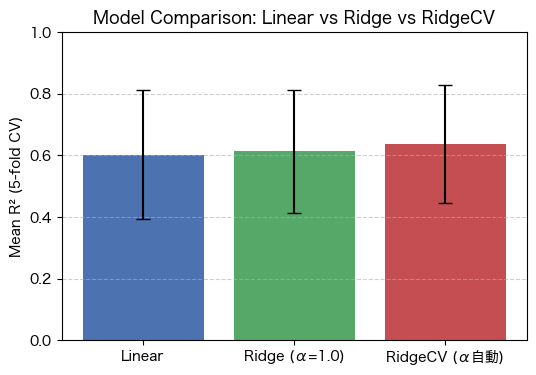

In [74]:
evaluate_and_visualize_models(x_reduced, y, n_splits=5)

## Conclusion

## Model Improvement through Regularization and Cross-Validation

In the initial linear regression model, the R² score was high for the training data but low for the test data, indicating a clear **overfitting tendency**.  
This overfitting was considered to be caused by **multicollinearity** among explanatory variables and by the model’s excessive complexity.  
To address this, correlations among features were examined, redundant variables were removed, and the model was re-evaluated.  
The results were as follows:
- R² on training data: 0.835  
- R² on test data: 0.335  

To further mitigate the issue, **Ridge Regression (L2 regularization)** was introduced.  
Ridge Regression applies a penalty to the magnitude of the coefficients, helping to control model complexity and reduce overfitting.

Additionally, **RidgeCV** was employed to automatically optimize the regularization parameter α through **K-Fold Cross-Validation (CV)**.  
K-Fold CV divides the dataset into multiple folds and repeatedly trains and validates the model on different splits, reducing dependency on a single data split and providing a more reliable estimate of the **average generalization performance (mean CV R²)**.

As a result, with the optimal α selected by RidgeCV (α = 10.0 in this case), the model achieved:
- R² on training data: 0.813  
- R² on test data: 0.593  
- Mean R² from K-Fold CV: 0.638 ± 0.191  

These results show that the degree of overfitting was reduced, and the model achieved **more stable generalization performance**.  
Overall, this process represents a natural and effective approach for improving model stability and robustness in linear regression.
